In [161]:
import time
import pandas as pd
import numpy as np
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

In [162]:
data4 = pd.read_excel('DataRegression.xlsx', sheet_name='Var04')
data11 = pd.read_excel('DataRegression.xlsx', sheet_name='Var11')

In [163]:
y_4 = data4['y'].values
x_4 = data4['x'].values
y_11 = data11['y'].values
x_11 = data11['x'].values

In [164]:
def func_4(B, x=x_4):
    if len(B) != 7:
        assert "B must have 7 elements"
    sum1 = B[0] * np.exp(-B[1]*x)
    sum2 = B[2] * np.exp(-((x-B[3])/B[4])**2)
    sum3 = B[5] * np.exp(-((x-B[6])/B[4])**2)
    y = sum1 + sum2 + sum3
    return y
bounds_4 = np.array([[10, 100], [0, 1], [100, 200], [10, 100], [10, 100], [10, 100], [100, 200]])

In [165]:
def funcError_4(params):
    N = params.shape[0]
    s = np.zeros(N)
    for i in range(N):
        R = func_4(params[i, :])
        s[i] = np.mean((y_4 - R) ** 2)  
    return s  


# PSO

In [166]:
def func_11(B, x=x_11):
    if len(B) != 2:
        assert "B must have 2 elements"
    numerator = B[0] * B[1] * x
    denominator = 1 + B[1] * x
    y = numerator / denominator
    return y
bounds_11 = np.array([[100, 1000], [0, 1]])

In [167]:
def funcError_11(params):
    N = params.shape[0]
    s = np.zeros(N)
    for i in range(N):
        R = func_11(params[i, :])
        s[i] = np.mean((y_11 - R) ** 2)  
    return s 

## 4

In [168]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.8}
min_bound_4 = bounds_4[:, 0]
max_bound_4 = bounds_4[:, 1]
bounds = (min_bound_4, max_bound_4)
optimizer = ps.single.GlobalBestPSO(n_particles=1000, dimensions=7, options=options, bounds=bounds)

In [169]:
t0 = time.time()
cost, pos = optimizer.optimize(funcError_4, iters=500)
t1 = time.time()
print('time (in sec) is', t1-t0)

2025-05-21 00:54:24,519 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=14.2
2025-05-21 00:54:50,304 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 14.193227328286245, best pos: [9.99543093e+01 1.11540640e-02 1.05880450e+02 6.73099404e+01
 2.19092295e+01 6.77896057e+01 1.78900534e+02]


time (in sec) is 25.78596591949463


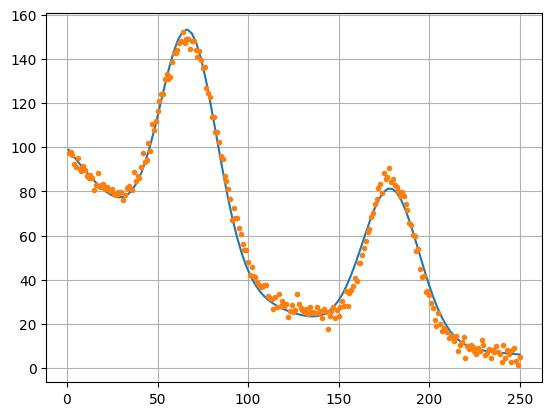

In [170]:
xx = np.linspace(min(x_4),max(x_4),100)
yy = func_4(pos, xx)
plt.plot(xx,yy), plt.plot(x_4,y_4,'.'), plt.grid('on')
plt.show()

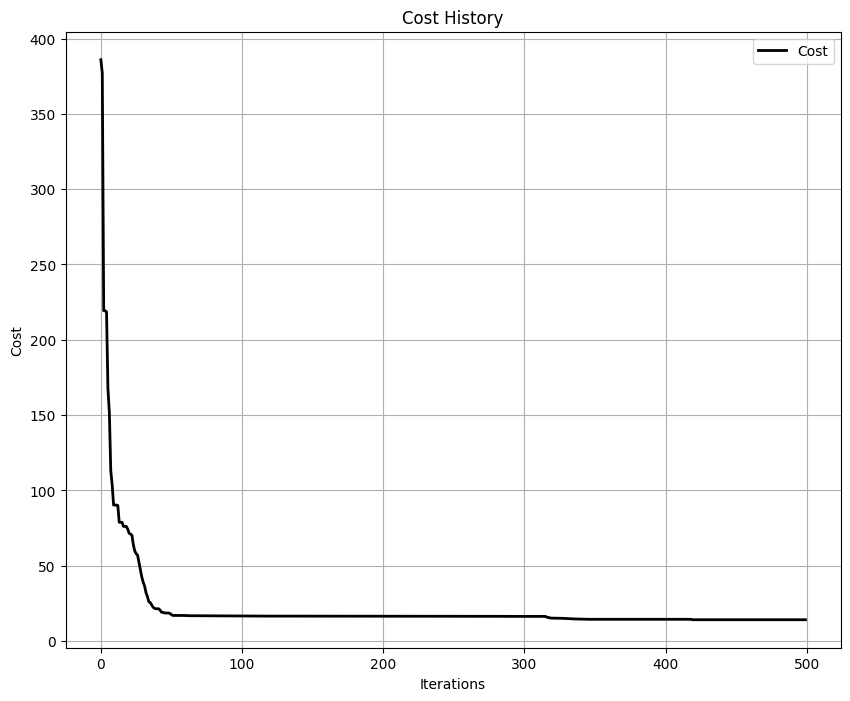

In [171]:
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

## 11

In [172]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.8}
min_bound_11 = bounds_11[:, 0]
max_bound_11 = bounds_11[:, 1]
bounds = (min_bound_11, max_bound_11)
optimizer = ps.single.GlobalBestPSO(n_particles=1000, dimensions=2, options=options, bounds=bounds)

In [173]:
t0 = time.time()
cost, pos = optimizer.optimize(funcError_11, iters=500)
t1 = time.time()
print('time (in sec) is', t1-t0)

2025-05-21 00:54:50,781 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
pyswarms.single.global_best: 100%|██████████|500/500, best_cost=0.00404
2025-05-21 00:55:03,603 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.004039125006167017, best pos: [4.37973867e+02 3.01787839e-04]


time (in sec) is 12.82296371459961


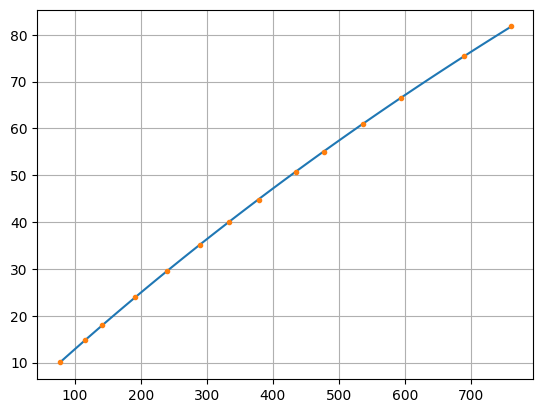

In [174]:
xx = np.linspace(min(x_11),max(x_11),100)
yy = func_11(pos, xx)
plt.plot(xx,yy), plt.plot(x_11,y_11,'.'), plt.grid('on')
plt.show()

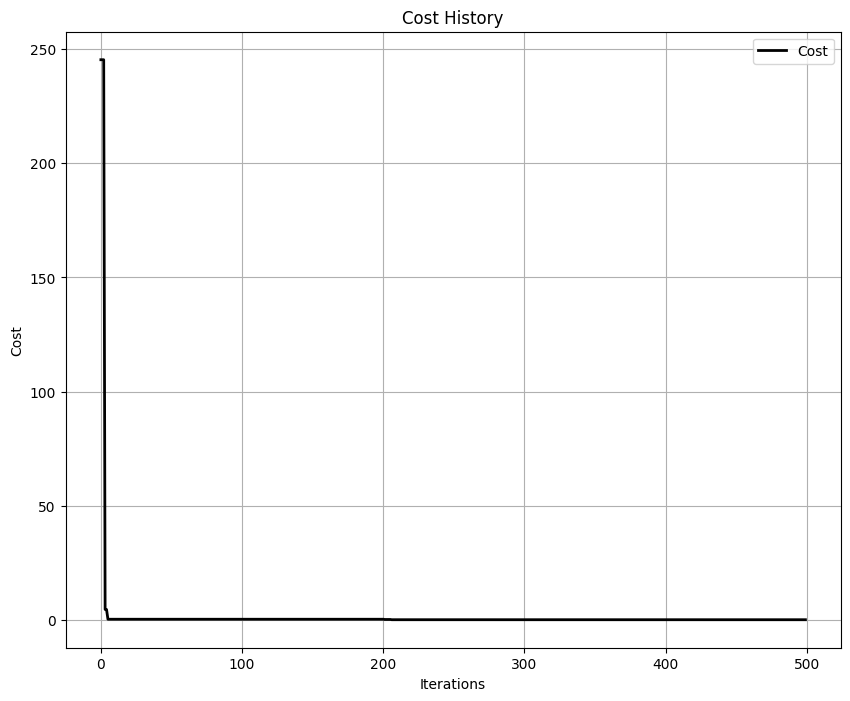

In [175]:
plot_cost_history(cost_history=optimizer.cost_history), plt.grid('on')
plt.show()

# DE

## 4

In [176]:
from scipy.optimize import differential_evolution


In [177]:
cost_history = []

def callback_func(xk, convergence=0):
    val = funcError_4(xk)
    cost_history.append(val)
    return False


In [178]:
def funcError_4(B):
    R = func_4(B)
    return np.mean((y_4 - R)**2)

In [179]:
t0 = time.time()
result_4 = differential_evolution(funcError_4, bounds=bounds_4, maxiter=1000, callback=callback_func)
t1 = time.time()
print(f'func_4 optimization done in {t1-t0:.2f} sec')
print('Best cost:', result_4.fun)
print('Best params:', result_4.x)


func_4 optimization done in 0.80 sec
Best cost: 13.619646234491508
Best params: [1.00000000e+02 1.07961097e-02 1.04113100e+02 6.75599948e+01
 2.17627391e+01 6.65466944e+01 1.78992776e+02]


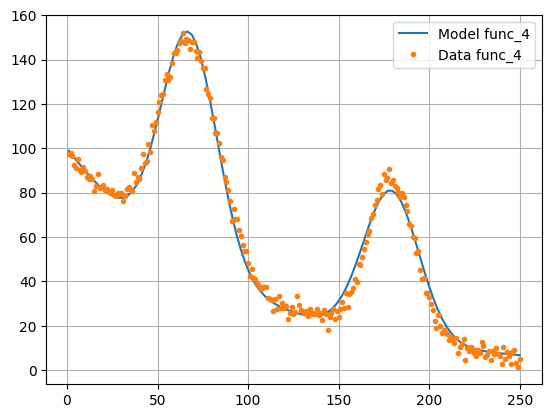

In [180]:

xx = np.linspace(min(x_4), max(x_4), 100)
yy = func_4(result_4.x, xx)
plt.plot(xx, yy, label='Model func_4')
plt.plot(x_4, y_4, '.', label='Data func_4')
plt.grid(True)
plt.legend()
plt.show()


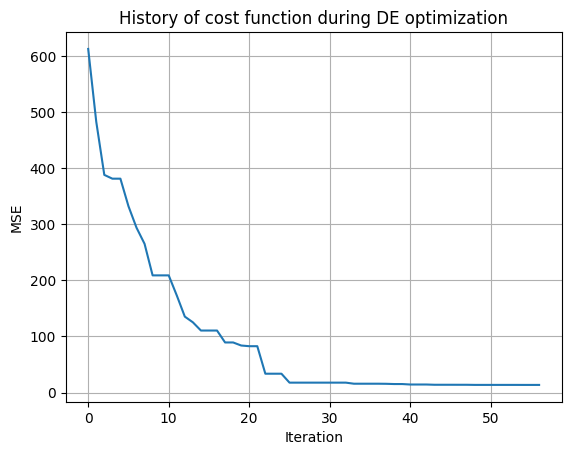

In [181]:
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('History of cost function during DE optimization')
plt.grid(True)
plt.show()

## 11

In [182]:
cost_history = []

def callback_func(xk, convergence=0):
    val = funcError_11(xk)
    cost_history.append(val)
    return False

In [183]:
def funcError_11(B):
    R = func_11(B)
    return np.mean((y_11 - R)**2)

In [184]:
t0 = time.time()
result_11 = differential_evolution(funcError_11, bounds=bounds_11, maxiter=1000, callback=callback_func)
t1 = time.time()
print(f'func_11 optimization done in {t1-t0:.2f} sec')
print('Best cost:', result_11.fun)
print('Best params:', result_11.x)


func_11 optimization done in 0.26 sec
Best cost: 0.004030347801777028
Best params: [4.37291238e+02 3.02339846e-04]


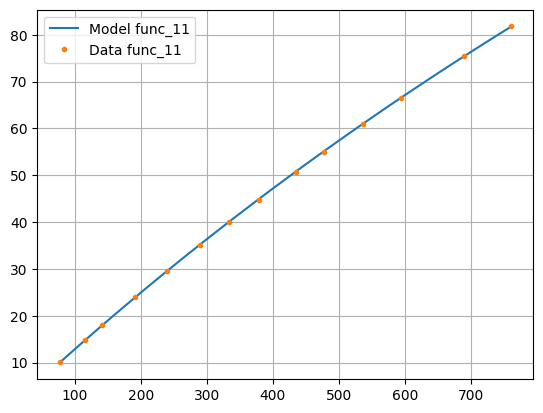

In [185]:

xx = np.linspace(min(x_11), max(x_11), 100)
yy = func_11(result_11.x, xx)
plt.plot(xx, yy, label='Model func_11')
plt.plot(x_11, y_11, '.', label='Data func_11')
plt.grid(True)
plt.legend()
plt.show()


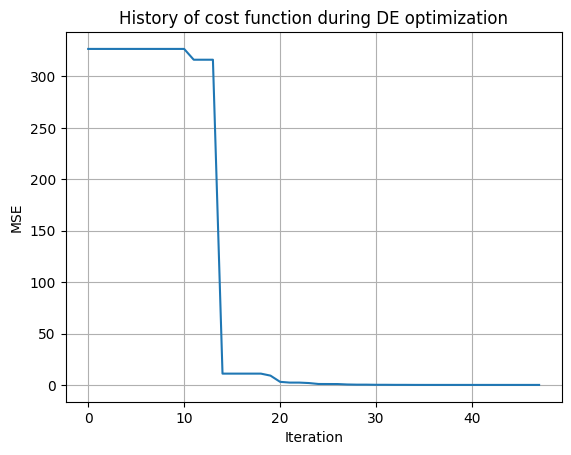

In [186]:
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('History of cost function during DE optimization')
plt.grid(True)
plt.show()